### Credits:
https://www.hackersrealm.net/post/titanic-dataset-analysis-using-python


### Why do EDA

- Model building
- Analysis and reporting
- Validate assumptions
- Handling missing values
- feature engineering
- detecting outliers

### Column Types

- **Numerical** - Age,Fare,PassengerId
- **Categorical** - Survived, Pclass, Sex, SibSp, Parch,Embarked
    - NOMINAL ORDINAL
- **Mixed** - Name, Ticket, Cabin

### The shape of a data distribution
-- refers to its overall pattern or form as it is represented on a graph. Some common shapes of data distributions include:

- **Normal Distribution**: A symmetrical and bell-shaped distribution where the mean, median, and mode are equal and the majority of the data falls in the middle of the distribution with gradually decreasing frequencies towards the tails.

- **Skewed Distribution**: A distribution that is not symmetrical, with one tail being longer than the other. It can be either positively skewed (right-skewed) or negatively skewed (left-skewed).

- **Bimodal Distribution**: A distribution with two peaks or modes.

- **Uniform Distribution**: A distribution where all values have an equal chance of occurring.

The shape of the data distribution is important in identifying the presence of outliers, skewness, and the type of statistical tests and models that can be used for further analysis.

### Steps of doing Univariate Analysis on Numerical columns

- **Descriptive Statistics**: Compute basic summary statistics for the column, such as mean, median, mode, standard deviation, range, and quartiles. These statistics give a general understanding of the distribution of the data and can help identify skewness or outliers.

- **Visualizations**: Create visualizations to explore the distribution of the data. Some common visualizations for numerical data include histograms, box plots, and density plots. These visualizations provide a visual representation of the distribution of the data and can help identify skewness an outliers.

- **Identifying Outliers**: Identify and examine any outliers in the data. Outliers can be identified using visualizations. It is important to determine whether the outliers are due to measurement errors, data entry errors, or legitimate differences in the data, and to decide whether to include or exclude them from the analysis.

- **Skewness**: Check for skewness in the data and consider transforming the data or using robust statistical methods that are less sensitive to skewness, if necessary.

- **Conclusion**: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Display multiple Variables without print() statements¶
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_columns = None
pd.options.display.max_rows = None

path = "/content/"
df_train = pd.read_csv(path + 'train.csv')
df_test = pd.read_csv(path + 'test.csv')

df = df_train

df_train.count()
df_test.count()
df_test.head(10)
df_train.head(10)

,0
customerID,1000
gender,1000
SeniorCitizen,1000
Partner,1000
Dependents,1000
tenure,1000
Contract,1000
PaymentMethod,1000
MonthlyCharges,1000
TotalCharges,1000


,0
customerID,100
gender,100
SeniorCitizen,100
Partner,100
Dependents,100
tenure,100
Contract,100
PaymentMethod,100
MonthlyCharges,100
TotalCharges,100


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,8049-WJCLQ,Male,0,1,1,10,Month-to-month,Mailed check,60.20,563.50,0
1,2830-LEWOA,Male,0,1,1,61,One year,Credit card (automatic),103.90,6449.15,0
2,9780-FKVVF,Male,0,0,0,6,Month-to-month,Bank transfer (automatic),59.15,336.70,0
3,5014-GSOUQ,Male,0,0,0,13,Two year,Mailed check,19.95,243.65,0
4,0396-HUJBP,Female,0,0,0,2,Month-to-month,Mailed check,19.30,44.40,0
5,8356-WUAOJ,Female,0,1,0,1,Month-to-month,Electronic check,45.00,45.00,0
6,5442-BHQNG,Female,0,0,0,2,Month-to-month,Electronic check,70.35,139.25,0
7,5655-JSMZM,Male,1,0,0,49,Month-to-month,Electronic check,96.20,4718.25,1
8,7065-YUNRY,Female,0,0,0,1,Month-to-month,Mailed check,45.30,45.30,1
9,5161-XEUVX,Male,0,1,0,37,Two year,Mailed check,94.30,3460.95,0


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1024-GUALD,Female,0,1,0,1,Month-to-month,Electronic check,24.80,24.80,1
1,0484-JPBRU,Male,0,0,0,41,Month-to-month,Bank transfer (automatic),25.25,996.45,0
2,3620-EHIMZ,Female,0,1,1,52,Two year,Mailed check,19.35,1031.70,0
3,6910-HADCM,Female,0,0,0,1,Month-to-month,Electronic check,76.35,76.35,1
4,8587-XYZSF,Male,0,0,0,67,Two year,Bank transfer (automatic),50.55,3260.10,0
5,6818-WOBHJ,Female,1,1,0,68,Month-to-month,Bank transfer (automatic),89.60,6127.60,1
6,3082-YVEKW,Female,0,1,1,23,Two year,Bank transfer (automatic),77.15,1759.40,0
7,4737-AQCPU,Male,0,1,1,72,Two year,Credit card (automatic),72.10,5016.65,0
8,4853-RULSV,Male,0,0,0,70,Two year,Credit card (automatic),104.00,7250.15,1
9,5766-ZJYBB,Male,0,0,0,1,Month-to-month,Mailed check,19.40,19.40,1


,SeniorCitizen,Partner,Dependents,tenure,MonthlyCharges,TotalCharges,Churn
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.164000,0.474000,0.305000,31.971000,64.146300,2192.922272,0.265000
std,0.370461,0.499573,0.460638,24.933789,29.880722,2217.643807,0.441554
min,0.000000,0.000000,0.000000,0.000000,18.700000,19.400000,0.000000
25%,0.000000,0.000000,0.000000,8.000000,34.925000,368.675000,0.000000
50%,0.000000,0.000000,0.000000,27.500000,69.750000,1314.450000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,89.400000,3551.850000,1.000000
max,1.000000,1.000000,1.000000,72.000000,117.500000,8670.100000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customerID      1000 non-null   object 
 1   gender          1000 non-null   object 
 2   SeniorCitizen   1000 non-null   int64  
 3   Partner         1000 non-null   int64  
 4   Dependents      1000 non-null   int64  
 5   tenure          1000 non-null   int64  
 6   Contract        1000 non-null   object 
 7   PaymentMethod   1000 non-null   object 
 8   MonthlyCharges  1000 non-null   float64
 9   TotalCharges    1000 non-null   float64
 10  Churn           1000 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 86.1+ KB


<Axes: >

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
Contract,0
PaymentMethod,0
MonthlyCharges,0
TotalCharges,0


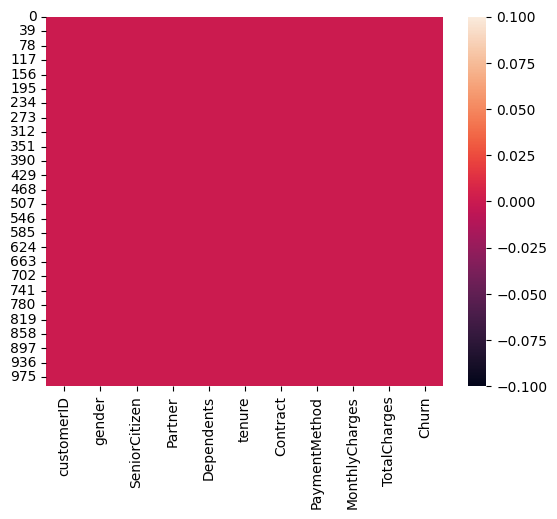

In [ ]:
## statistical info on numeric features
df.describe()

## datatype info on all features
df.info()

sns.heatmap(df.isnull())

df.isnull().sum()




### Univariate Analysis

Univariate analysis focuses on analyzing each feature in the dataset independently.

- **Distribution analysis**: The distribution of each feature is examined to identify its shape, central tendency, and dispersion.

- **Identifying potential issues**: Univariate analysis helps in identifying potential problems with the data such as outliers, skewness, and missing values

## Univariate categorical features

<Axes: xlabel='Churn', ylabel='count'>

<Axes: xlabel='Churn', ylabel='count'>

<Axes: xlabel='Churn', ylabel='count'>

<Axes: xlabel='Churn', ylabel='count'>

Text(0.5, 1.0, 'Churn by  PaymentMethod')

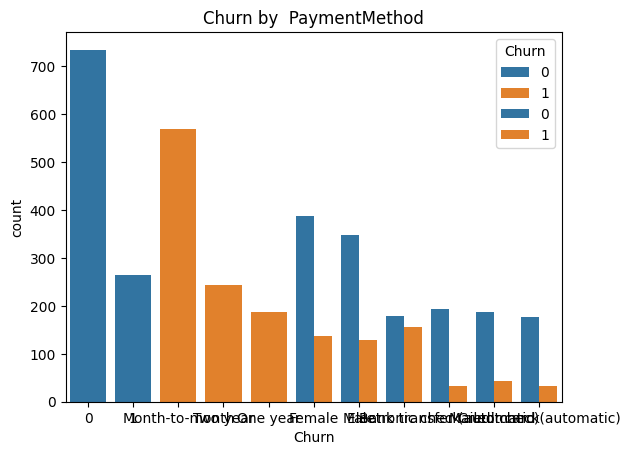

<Axes: ylabel='count'>

Text(0.5, 1.0, 'Senior Citizen Distribution')

Text(0, 0.5, '')

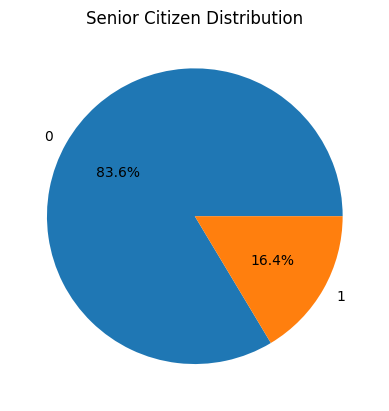

In [ ]:

sns.countplot(df, x="Churn")
sns.countplot(df, x="Contract")
sns.countplot(df, x="gender", hue='Churn')




sns.countplot(df, x="PaymentMethod", hue="Churn")
plt.title("Churn by  PaymentMethod")
plt.show()


df['SeniorCitizen'].value_counts().plot(kind='pie', autopct='%0.1f%%')
plt.title("Senior Citizen Distribution")
plt.ylabel("")
plt.show()


missing_values = df['TotalCharges'].isnull().sum()




## Univariate numerical features

<Axes: title={'center': 'Churn = 1'}, xlabel='tenure', ylabel='tenure'>

,tenure
count,1000.000000
mean,31.971000
std,24.933789
min,0.000000
25%,8.000000
50%,27.500000
75%,55.000000
max,72.000000


0.2619013899634497

<Axes: title={'center': 'Churn = 1'}, xlabel='tenure', ylabel='tenure'>

-1.401714794307279

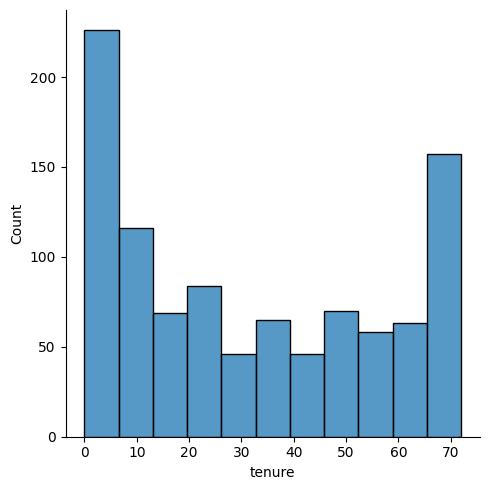

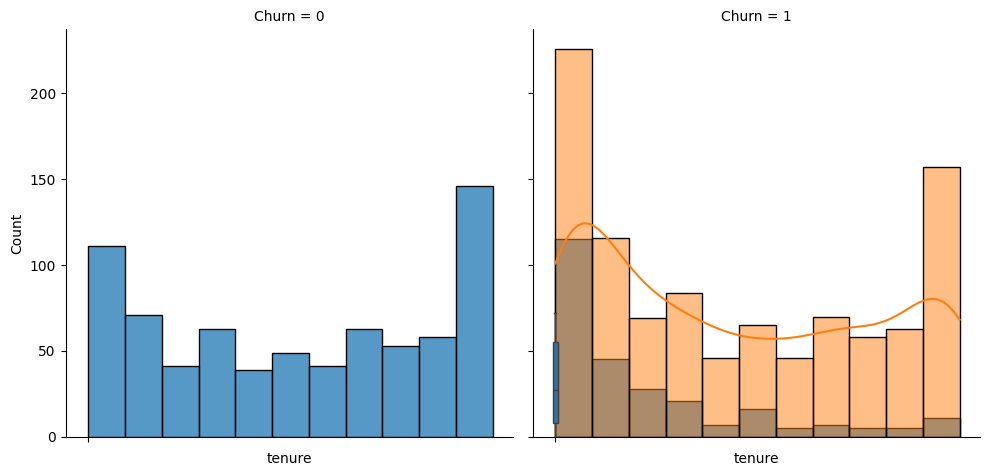

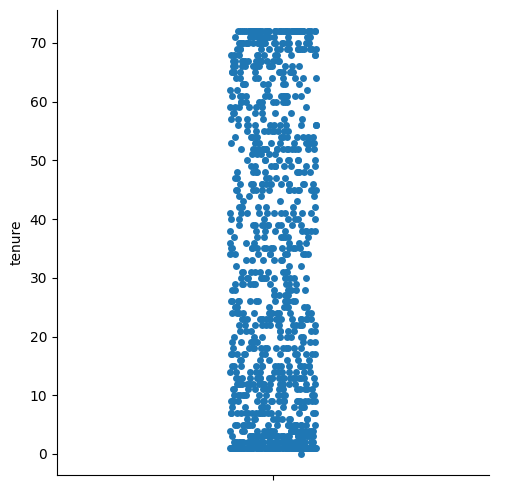

In [ ]:


# Univariate numerical analysis for the 'tenure' feature
sns.displot(df, x='tenure')  # Plotting histogram for the 'tenure' distribution


sns.displot(df, x='tenure', col='Churn')  # tenure distribution for each churn category


# Boxplot to show the spread and outliers for 'tenure'
sns.boxplot(df, y='tenure')  # Displaying the boxplot fortenure


# Summary statistics for 'tenure'
df['tenure'].describe()

# Skewness of the 'tenure' distribution
df['tenure'].skew()
sns.histplot(df['tenure'], kde=True)


# Kurtosis of the 'tenure' distribution
df['tenure'].kurt()

# Visualizing 'tenure' distribution
sns.catplot(df, y='tenure')  # Using catplot to display the distribution

# Checking missing data percentage for 'tenure'
missing_data = df['tenure'].isnull().sum() / len(df['tenure']) * 100
# Filtering customers with tenure greater than 65
older_customers = df[df['tenure'] > 65]



<Axes: xlabel='MonthlyCharges', ylabel='Density'>

<Axes: xlabel='MonthlyCharges', ylabel='Density'>

,MonthlyCharges
count,1000.000000
mean,64.146300
std,29.880722
min,18.700000
25%,34.925000
50%,69.750000
75%,89.400000
max,117.500000


-0.21787033903538455

0.0

[0      False
 1      False
 2      False
 3      False
 4      False
 5      False
 6      False
 7      False
 8       True
 9      False
 10     False
 11     False
 12     False
 13     False
 14     False
 15     False
 16     False
 17     False
 18     False
 19     False
 20     False
 21     False
 22     False
 23      True
 24      True
 25     False
 26     False
 27     False
 28     False
 29     False
 30      True
 31     False
 32     False
 33     False
 34     False
 35     False
 36     False
 37      True
 38      True
 39      True
 40     False
 41      True
 42     False
 43     False
 44     False
 45     False
 46     False
 47     False
 48     False
 49     False
 50     False
 51     False
 52      True
 53     False
 54     False
 55     False
 56      True
 57      True
 58     False
 59      True
 60     False
 61     False
 62     False
 63      True
 64     False
 65     False
 66     False
 67     False
 68     False
 69     False
 70     False
 71   

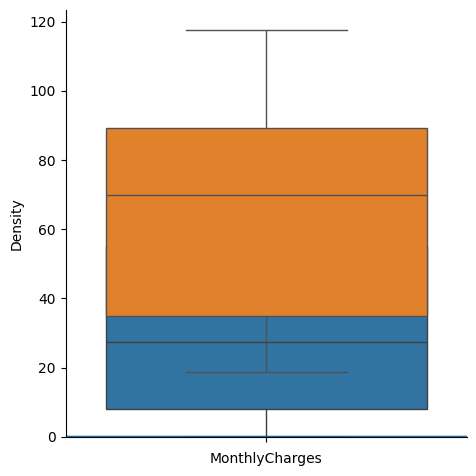

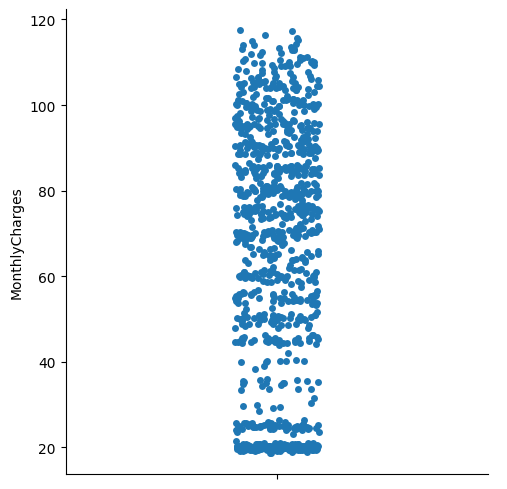

In [ ]:
# Univariate numerical feature analysis - 'MonthlyCharges'
sns.displot(df, x='MonthlyCharges', kind='kde')  # KDE plot for MonthlyCharges distribution
sns.boxplot(df, y='tenure')
sns.boxplot(df, y='MonthlyCharges')  # Boxplot to display the distribution and outliers
sns.catplot(df, y='MonthlyCharges')  # Display 'MonthlyCharges' distribution with a catplot

# Summary statistics for 'MonthlyCharges'
df['MonthlyCharges'].describe()

# Skewness of the 'MonthlyCharges' distribution
df['MonthlyCharges'].skew()

# Missing data percentage for 'MonthlyCharges'
df['MonthlyCharges'].isnull().sum() / len(df['MonthlyCharges']) * 100


[(df['MonthlyCharges'] > 100) & (df['MonthlyCharges'] < 150.0)]






## Bivariate Analysis

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix of Selected Features')

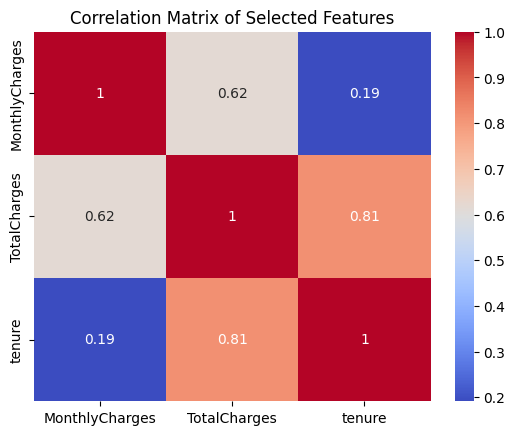

In [ ]:
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')

# Calculate the correlation matrix for selected numerical features
corr = df[['MonthlyCharges', 'TotalCharges', 'tenure']].corr()

# Plot the heatmap for correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Selected Features')
plt.show()


Text(0.5, 1.0, 'Monthly Charges Distribution by Churn Status')

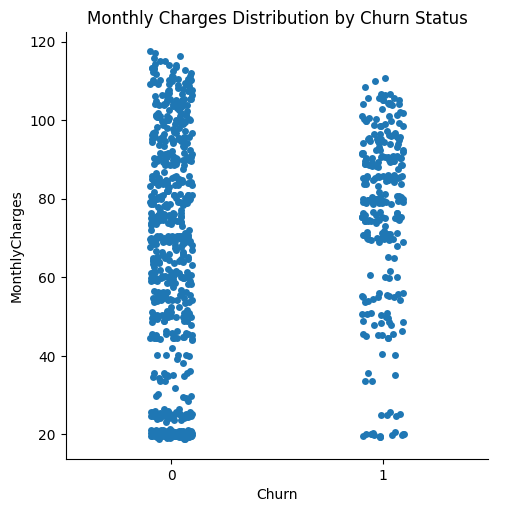

Text(0.5, 1.0, 'MonthlyCharges Distribution by Churn Status')

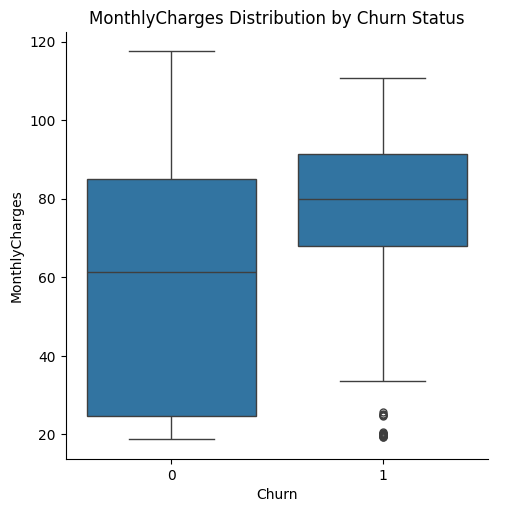

nan

Text(0.5, 1.0, 'Total Charges Distribution by Churn Status')

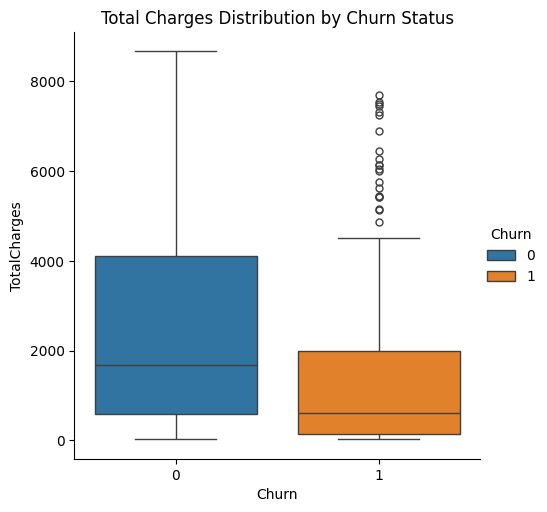

<Axes: xlabel='MonthlyCharges', ylabel='Density'>

Text(0.5, 1.0, 'Monthly Charges Distribution by Churn Status')

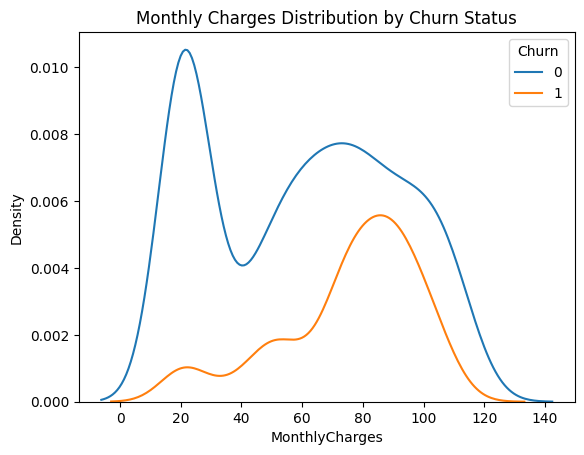

In [ ]:
sns.catplot(df, x="Churn", y='MonthlyCharges')
plt.title('Monthly Charges Distribution by Churn Status')
plt.show()

# Boxplot for 'MonthlyCharges'
sns.catplot(df, x="Churn", y='MonthlyCharges', kind='box')
plt.title('MonthlyCharges Distribution by Churn Status')
plt.show()


# Boxplot for 'TotalCharges' (if applicable) across 'Churn' categories
sns.catplot(df, x="Churn", y='TotalCharges', kind='box', hue='Churn')
df[df['Churn'] == 'Yes']['MonthlyCharges'].mean()
plt.title('Total Charges Distribution by Churn Status')
plt.show()

# KDE plot for 'MonthlyCharges' differentiated by 'Churn'
sns.kdeplot(df, x='MonthlyCharges', hue='Churn')
plt.title('Monthly Charges Distribution by Churn Status')
plt.show()



In [ ]:
## categorical - categorical
# * You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.
# * You can plots like heatmap, stacked barplots, treemaps

pd.crosstab(df['Churn'], df['PaymentMethod'], normalize='columns') * 100
pd.crosstab(df['Contract'], df['PaymentMethod'], normalize='columns') * 100
pd.crosstab(df['Churn'], df['Contract'], normalize='columns') * 100




PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Churn,,,,
0,85.777778,84.285714,53.293413,80.952381
1,14.222222,15.714286,46.706587,19.047619


PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Contract,,,,
Month-to-month,33.333333,40.000000,81.137725,60.173160
One year,24.444444,23.333333,14.071856,15.584416
Two year,42.222222,36.666667,4.790419,24.242424


Contract,Month-to-month,One year,Two year
Churn,,,
0,57.820738,90.374332,97.131148
1,42.179262,9.625668,2.868852


## **Data Preprocessing**

### Combine the train and test datasets

In [ ]:
# Concatenate the training and test datasets
df = pd.concat([df_train, df_test], axis=0)

# Reset the index of the dataframe
df = df.reset_index(drop=True)

# Check the length of the combined dataset
len(df)

df.head(10)

df.describe()


1100

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1024-GUALD,Female,0,1,0,1,Month-to-month,Electronic check,24.80,24.80,1
1,0484-JPBRU,Male,0,0,0,41,Month-to-month,Bank transfer (automatic),25.25,996.45,0
2,3620-EHIMZ,Female,0,1,1,52,Two year,Mailed check,19.35,1031.70,0
3,6910-HADCM,Female,0,0,0,1,Month-to-month,Electronic check,76.35,76.35,1
4,8587-XYZSF,Male,0,0,0,67,Two year,Bank transfer (automatic),50.55,3260.10,0
5,6818-WOBHJ,Female,1,1,0,68,Month-to-month,Bank transfer (automatic),89.60,6127.60,1
6,3082-YVEKW,Female,0,1,1,23,Two year,Bank transfer (automatic),77.15,1759.40,0
7,4737-AQCPU,Male,0,1,1,72,Two year,Credit card (automatic),72.10,5016.65,0
8,4853-RULSV,Male,0,0,0,70,Two year,Credit card (automatic),104.00,7250.15,1
9,5766-ZJYBB,Male,0,0,0,1,Month-to-month,Mailed check,19.40,19.40,1


,SeniorCitizen,Partner,Dependents,tenure,MonthlyCharges,TotalCharges,Churn
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,0.168182,0.471818,0.300909,32.034545,64.660773,2219.613702,0.263636
std,0.374198,0.499432,0.458862,24.836145,29.971512,2225.063230,0.440805
min,0.000000,0.000000,0.000000,0.000000,18.700000,19.400000,0.000000
25%,0.000000,0.000000,0.000000,8.000000,35.425000,369.200000,0.000000
50%,0.000000,0.000000,0.000000,28.000000,69.975000,1344.000000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,89.850000,3586.087500,1.000000
max,1.000000,1.000000,1.000000,72.000000,117.500000,8670.100000,1.000000


## Feature Engineering on Monthly Charge and Total Charge


,MonthlyCharges
0,24.80
1,25.25
2,19.35
3,76.35
4,50.55


<Axes: xlabel='MonthlyCharges'>

,MonthlyCharges
count,1100.000000
mean,64.660773
std,29.971512
min,18.700000
25%,35.425000
50%,69.975000
75%,89.850000
max,117.500000


<Axes: xlabel='MonthlyCharges', ylabel='Density'>

,count
MonthlyCharge_Cut,
"(59.63, 78.75]",222
"(18.698999999999998, 24.94]",220
"(24.94, 59.63]",220
"(93.89, 117.5]",220
"(78.75, 93.89]",218


,count
MonthlyCharge_Cut,
2,222
0,220
1,220
4,220
3,218


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharge_Cut
0,1024-GUALD,Female,0,1,0,1,Month-to-month,Electronic check,24.80,24.80,1,0
1,0484-JPBRU,Male,0,0,0,41,Month-to-month,Bank transfer (automatic),25.25,996.45,0,1
2,3620-EHIMZ,Female,0,1,1,52,Two year,Mailed check,19.35,1031.70,0,0
3,6910-HADCM,Female,0,0,0,1,Month-to-month,Electronic check,76.35,76.35,1,2
4,8587-XYZSF,Male,0,0,0,67,Two year,Bank transfer (automatic),50.55,3260.10,0,1


Churn,0,1
MonthlyCharge_Cut,,
0,92.727273,7.272727
1,77.272727,22.727273
2,73.423423,26.576577
3,55.045872,44.954128
4,69.545455,30.454545


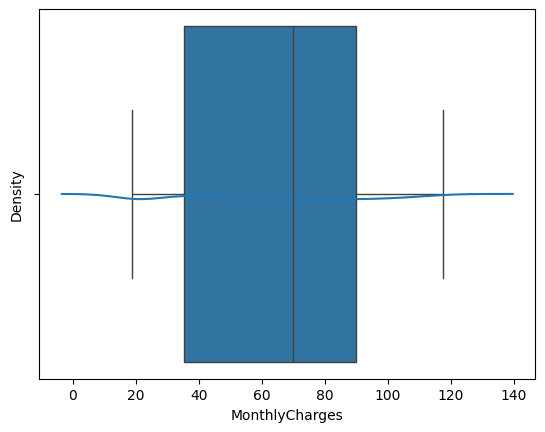

In [ ]:
# Checking the first few entries for the 'MonthlyCharges' column
df['MonthlyCharges'].head()

# If there are missing values, fill them with the mean value of the column
df['MonthlyCharges'] = df['MonthlyCharges'].fillna(df['MonthlyCharges'].mean())

# Visualize the distribution of Monthly Charges using a boxplot
sns.boxplot(x=df['MonthlyCharges'])

# Check summary statistics for 'MonthlyCharges'
df['MonthlyCharges'].describe()

# Plot the distribution of 'MonthlyCharges' based on 'Churn' status
sns.kdeplot(df['MonthlyCharges'])

# Categorize 'MonthlyCharges' into 5 quantile-based categories
df['MonthlyCharge_Cut'] = pd.qcut(df['MonthlyCharges'], 5)
df['MonthlyCharge_Cut'].value_counts()

# Encode the 'MonthlyCharge_Cut' into numerical labels for analysis
le = LabelEncoder()
df['MonthlyCharge_Cut'] = le.fit_transform(df['MonthlyCharge_Cut'])
df['MonthlyCharge_Cut'].value_counts()

# Check the first few rows to confirm the transformations
df.head()

# Create a cross-tabulation to analyze the churn rate based on the categories of 'MonthlyCharge_Cut'
pd.crosstab(df['MonthlyCharge_Cut'], df['Churn'], normalize='index') * 100


,TotalCharges
0,24.80
1,996.45
2,1031.70
3,76.35
4,3260.10


<Axes: xlabel='TotalCharges'>

,TotalCharges
count,1100.000000
mean,2219.613702
std,2225.063230
min,19.400000
25%,369.200000
50%,1344.000000
75%,3586.087500
max,8670.100000


,count
TotalCharge_Cut,
"(19.398999999999997, 251.01]",220
"(251.01, 936.86]",220
"(936.86, 1971.84]",220
"(1971.84, 4264.12]",220
"(4264.12, 8670.1]",220


,count
TotalCharge_Cut,
0,220
2,220
3,220
4,220
1,220


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharge_Cut,TotalCharge_Cut
0,1024-GUALD,Female,0,1,0,1,Month-to-month,Electronic check,24.80,24.80,1,0,0
1,0484-JPBRU,Male,0,0,0,41,Month-to-month,Bank transfer (automatic),25.25,996.45,0,1,2
2,3620-EHIMZ,Female,0,1,1,52,Two year,Mailed check,19.35,1031.70,0,0,2
3,6910-HADCM,Female,0,0,0,1,Month-to-month,Electronic check,76.35,76.35,1,2,0
4,8587-XYZSF,Male,0,0,0,67,Two year,Bank transfer (automatic),50.55,3260.10,0,1,3


Churn,0,1
TotalCharge_Cut,,
0,57.272727,42.727273
1,68.181818,31.818182
2,76.818182,23.181818
3,77.727273,22.272727
4,88.181818,11.818182


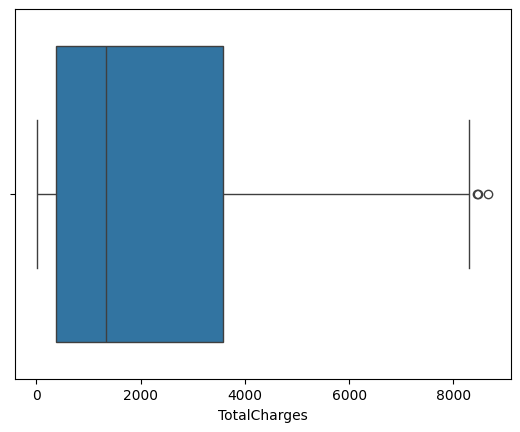

In [ ]:
# Checking the first few entries for the 'TotalCharges' column
df['TotalCharges'].head()

# Replace empty strings or spaces with NaN
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)

# Convert 'TotalCharges' to numeric, coercing errors (non-numeric values become NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# If there are missing values, fill them with the mean value of the column
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

# Visualize the distribution of Total Charges using a boxplot
sns.boxplot(x=df['TotalCharges'])

# Check summary statistics for 'TotalCharges'
df['TotalCharges'].describe()

# Categorize 'TotalCharges' into 5 quantile-based categories
df['TotalCharge_Cut'] = pd.qcut(df['TotalCharges'], 5)
df['TotalCharge_Cut'].value_counts()

# Encode the 'TotalCharge_Cut' into numerical labels for analysis
le = LabelEncoder()
df['TotalCharge_Cut'] = le.fit_transform(df['TotalCharge_Cut'])
df['TotalCharge_Cut'].value_counts()

# Check the first few rows to confirm the transformations
df.head()

# Create a cross-tabulation to analyze the churn rate based on the categories of 'TotalCharge_Cut'
pd.crosstab(df['TotalCharge_Cut'], df['Churn'], normalize='index') * 100


<Axes: xlabel='TotalCharges', ylabel='Density'>

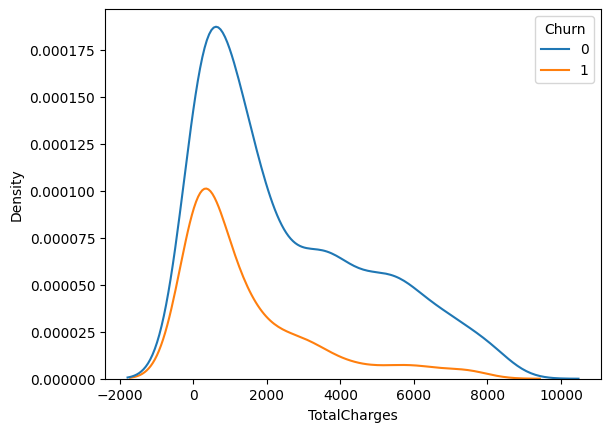

In [ ]:
# Ensure 'Churn' is a categorical column, if not convert it.
df['Churn'] = df['Churn'].astype('category')

# Plot the distribution of 'TotalCharges' based on 'Churn' status
sns.kdeplot(data=df, x='TotalCharges', hue='Churn')


### Feature Engineering to Create  Family Size






In [ ]:
df['Family_Size'] = df['SeniorCitizen'] + df['Partner'] + 1
df['Family_Size'].value_counts()
pd.crosstab(df['Family_Size'],df['Partner'],normalize='index')*100

df.head(5)

,count
Family_Size,
2,520
1,488
3,92


Partner,0,1
Family_Size,,
1,100.000000,0.000000
2,17.884615,82.115385
3,0.000000,100.000000


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharge_Cut,TotalCharge_Cut,Family_Size
0,1024-GUALD,Female,0,1,0,1,Month-to-month,Electronic check,24.80,24.80,1,0,0,2
1,0484-JPBRU,Male,0,0,0,41,Month-to-month,Bank transfer (automatic),25.25,996.45,0,1,2,1
2,3620-EHIMZ,Female,0,1,1,52,Two year,Mailed check,19.35,1031.70,0,0,2,2
3,6910-HADCM,Female,0,0,0,1,Month-to-month,Electronic check,76.35,76.35,1,2,0,1
4,8587-XYZSF,Male,0,0,0,67,Two year,Bank transfer (automatic),50.55,3260.10,0,1,3,1


### Feature Engineering to Create Family Type

In [ ]:
def transform_family_size(num):
  if num == 1:
    return 'alone'
  else:
    return "small"

df['Family_Type'] = df['Family_Size'].apply(transform_family_size)
df.head()

pd.crosstab(df['Churn'],df['Family_Type'],normalize='columns')*100

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharge_Cut,TotalCharge_Cut,Family_Size,Family_Type
0,1024-GUALD,Female,0,1,0,1,Month-to-month,Electronic check,24.80,24.80,1,0,0,2,small
1,0484-JPBRU,Male,0,0,0,41,Month-to-month,Bank transfer (automatic),25.25,996.45,0,1,2,1,alone
2,3620-EHIMZ,Female,0,1,1,52,Two year,Mailed check,19.35,1031.70,0,0,2,2,small
3,6910-HADCM,Female,0,0,0,1,Month-to-month,Electronic check,76.35,76.35,1,2,0,1,alone
4,8587-XYZSF,Male,0,0,0,67,Two year,Bank transfer (automatic),50.55,3260.10,0,1,3,1,alone


Family_Type,alone,small
Churn,,
0,69.877049,76.633987
1,30.122951,23.366013


### Handling outliers

In [ ]:

# Calculate the upper and lower bounds for 'TotalCharges' using IQR method
Q1 = np.percentile(df['TotalCharges'], 25)
Q3 = np.percentile(df['TotalCharges'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers in 'TotalCharges' based on IQR
df = df[(df['TotalCharges'] > lower_bound) & (df['TotalCharges'] < upper_bound)]

# Check the shape of the dataframe after removing outliers
df.shape


(1097, 15)

### Label Encoding for converting the labels into the numeric form

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# cols = ['', '']
# le = LabelEncoder()

# for col in cols:
#     df[col] = le.fit_transform(df[col])
# df.head()

### One hot encoding

In [ ]:
# Check the first few rows of the dataset
df.head(5)

# Apply one-hot encoding for categorical columns such as 'SeniorCitizen', 'Partner', 'Dependents', and others
df = pd.get_dummies(data=df, columns=[ 'Contract','PaymentMethod'], drop_first=True)
# Check the list of columns after one-hot encoding
df.columns.tolist()

# Display the updated DataFrame
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharge_Cut,TotalCharge_Cut,Family_Size,Family_Type
0,1024-GUALD,Female,0,1,0,1,Month-to-month,Electronic check,24.80,24.80,1,0,0,2,small
1,0484-JPBRU,Male,0,0,0,41,Month-to-month,Bank transfer (automatic),25.25,996.45,0,1,2,1,alone
2,3620-EHIMZ,Female,0,1,1,52,Two year,Mailed check,19.35,1031.70,0,0,2,2,small
3,6910-HADCM,Female,0,0,0,1,Month-to-month,Electronic check,76.35,76.35,1,2,0,1,alone
4,8587-XYZSF,Male,0,0,0,67,Two year,Bank transfer (automatic),50.55,3260.10,0,1,3,1,alone


['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'MonthlyCharge_Cut',
 'TotalCharge_Cut',
 'Family_Size',
 'Family_Type',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,MonthlyCharges,TotalCharges,Churn,MonthlyCharge_Cut,TotalCharge_Cut,Family_Size,Family_Type,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1024-GUALD,Female,0,1,0,1,24.80,24.80,1,0,0,2,small,False,False,False,True,False
1,0484-JPBRU,Male,0,0,0,41,25.25,996.45,0,1,2,1,alone,False,False,False,False,False
2,3620-EHIMZ,Female,0,1,1,52,19.35,1031.70,0,0,2,2,small,False,True,False,False,True
3,6910-HADCM,Female,0,0,0,1,76.35,76.35,1,2,0,1,alone,False,False,False,True,False
4,8587-XYZSF,Male,0,0,0,67,50.55,3260.10,0,1,3,1,alone,False,True,False,False,False


## Train-Test Split

In [ ]:
df.head()
train_len = len(df_train)
train = df.iloc[:train_len, :]
test = df.iloc[train_len:, :]
train.head()
test.head()

train.info()
test.info()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,MonthlyCharges,TotalCharges,Churn,MonthlyCharge_Cut,TotalCharge_Cut,Family_Size,Family_Type,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1024-GUALD,Female,0,1,0,1,24.80,24.80,1,0,0,2,small,False,False,False,True,False
1,0484-JPBRU,Male,0,0,0,41,25.25,996.45,0,1,2,1,alone,False,False,False,False,False
2,3620-EHIMZ,Female,0,1,1,52,19.35,1031.70,0,0,2,2,small,False,True,False,False,True
3,6910-HADCM,Female,0,0,0,1,76.35,76.35,1,2,0,1,alone,False,False,False,True,False
4,8587-XYZSF,Male,0,0,0,67,50.55,3260.10,0,1,3,1,alone,False,True,False,False,False


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,MonthlyCharges,TotalCharges,Churn,MonthlyCharge_Cut,TotalCharge_Cut,Family_Size,Family_Type,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1024-GUALD,Female,0,1,0,1,24.80,24.80,1,0,0,2,small,False,False,False,True,False
1,0484-JPBRU,Male,0,0,0,41,25.25,996.45,0,1,2,1,alone,False,False,False,False,False
2,3620-EHIMZ,Female,0,1,1,52,19.35,1031.70,0,0,2,2,small,False,True,False,False,True
3,6910-HADCM,Female,0,0,0,1,76.35,76.35,1,2,0,1,alone,False,False,False,True,False
4,8587-XYZSF,Male,0,0,0,67,50.55,3260.10,0,1,3,1,alone,False,True,False,False,False


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,MonthlyCharges,TotalCharges,Churn,MonthlyCharge_Cut,TotalCharge_Cut,Family_Size,Family_Type,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1003,5014-GSOUQ,Male,0,0,0,13,19.95,243.65,0,0,0,1,alone,False,True,False,False,True
1004,0396-HUJBP,Female,0,0,0,2,19.30,44.40,0,0,0,1,alone,False,False,False,False,True
1005,8356-WUAOJ,Female,0,1,0,1,45.00,45.00,0,1,0,2,small,False,False,False,True,False
1006,5442-BHQNG,Female,0,0,0,2,70.35,139.25,0,2,0,1,alone,False,False,False,True,False
1007,5655-JSMZM,Male,1,0,0,49,96.20,4718.25,1,4,4,2,small,False,False,False,True,False


<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1002
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   customerID                             1000 non-null   object  
 1   gender                                 1000 non-null   object  
 2   SeniorCitizen                          1000 non-null   int64   
 3   Partner                                1000 non-null   int64   
 4   Dependents                             1000 non-null   int64   
 5   tenure                                 1000 non-null   int64   
 6   MonthlyCharges                         1000 non-null   float64 
 7   TotalCharges                           1000 non-null   float64 
 8   Churn                                  1000 non-null   category
 9   MonthlyCharge_Cut                      1000 non-null   int64   
 10  TotalCharge_Cut                        1000 non-null   int64   
 

In [ ]:
X = train.drop(columns=['customerID','gender', 'Family_Type', 'Churn'],axis=1) # Drop non-numerical columns
y = train['Churn'] # Define the target variable

# ... (rest of the code remains the same)

## Model Training

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
# classify column
def classify(model):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print('Accuracy:', model.score(x_test, y_test))

    score = cross_val_score(model, X, y, cv=5)
    print('CV Score:', np.mean(score))

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model)

Accuracy: 0.812
CV Score: 0.8019999999999999


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model)

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
classify(model)

In [ ]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
classify(model)

In [ ]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(verbose=0)
classify(model)

## Complete Model Training with Full Train Data

In [ ]:
model = CatBoostClassifier()
model.fit(X, y)

## Check the prediction result over the test data

In [ ]:
# input split for test data
X_test = test.drop(columns=['customerID','gender', 'Family_Type', 'Churn'], axis=1)
X_test.head()

pred = model.predict(X_test)
pred

,SeniorCitizen,Partner,Dependents,tenure,MonthlyCharges,TotalCharges,MonthlyCharge_Cut,TotalCharge_Cut,Family_Size,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1003,0,0,0,13,19.95,243.65,0,0,1,False,True,False,False,True
1004,0,0,0,2,19.30,44.40,0,0,1,False,False,False,False,True
1005,0,1,0,1,45.00,45.00,1,0,2,False,False,False,True,False
1006,0,0,0,2,70.35,139.25,2,0,1,False,False,False,True,False
1007,1,0,0,49,96.20,4718.25,4,4,2,False,False,False,True,False


array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0])

## Test Submission into Kaggle Competition

In [ ]:
sub = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

sub.head()
sub.info()
pred.shape

# The predicted values are in the float format.
# Let's change it into integers before submitting the data.

sub['Survived'] = pred
sub['Survived'] = sub['Survived'].astype('int')
sub.info()
sub.head()

sub.to_csv('/kaggle/working/submission.csv', index=False)